<h1 style="font-weight: bold;">Titanic Survival</h1>

<h2 style="font-weight: bold;">1) Import libraries</h2>
<p>load the libraries to be used in the notebook</p>

In [1]:
import os
import numpy as np
import pandas as pd
import pprint
import missingno as mno
import altair as alt
import matplotlib.pyplot as plt
from pandas.plotting import table
from sklearn.model_selection import train_test_split

<h2 style='font-weight: bold;'>2) Setting notebook</h2>

In [2]:
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

<h2 style="font-weight: bold;">3) Load the data</h2>
<p>Load the csv file to pandas dataframe</p>

In [3]:
folder_path = "/home/den/programming/notes/ds/datasets/titanic"

if os.path.exists(folder_path):
    train_path = os.path.join(folder_path, "train.csv")
    test_path = os.path.join(folder_path, "test.csv")
else:
    raise ValueError("Unable to find titanic train and test csv files")

In [4]:
# Set the PassengerId column as index column.
index_col = 'PassengerId'

# Load the train and test dataframe.
train_df = pd.read_csv(train_path, index_col=index_col)
test_df = pd.read_csv(test_path, index_col=index_col)

<h2 style="font-weight: bold;">4) Data statistics</h2>
<p>Analyse train and test dataframe</p>

<h3 style="font-weight: bold;">i) Rows in train data</h3>
<p>View train dataframe top and bottom rows</p>

In [5]:
# First five rows in train data.
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# First five rows in test data.
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<h3 style="font-weight: bold;">ii) Rows in test data</h3>
<p>View test dataframe top and bottom rows</p>

In [7]:
# First five rows in test data.
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Last five rows in test data 
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<h3 style="font-weight: bold;">iii) Data description</h3>
<p>Get the know the datasets</p>

<h4 style="font-weight: bold;">a) Data shapes</h4>

In [9]:
# Train dataframe shape.
train_shape = train_df.shape
print(f"Train shape:\n\trows: {train_shape[0]}\n\tcolumns: {train_shape[1]}")

Train shape:
	rows: 891
	columns: 11


In [10]:
# Test dataframe shape.
test_shape = test_df.shape
print(f"Test shape:\n\trows: {test_shape[0]}\n\tcolumns: {test_shape[1]}")

Test shape:
	rows: 418
	columns: 10


<h4 style="font-weight: bold;">b) Data column names</h4>

In [11]:
columns = train_df.columns.tolist()
pprint.pprint(columns)

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']


In [12]:
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

<h4 style="font-weight: bold;">c) Data information</h4>

In [13]:
# Train data information.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [14]:
# Test data information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


<h4 style="font-weight: bold;">d) Describing the data</h4>

In [15]:
# Train dataframe description
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [16]:
def convert_low_unique_value_to_str(data: pd.DataFrame) -> pd.DataFrame:
    '''
    Convert low unique values columns to string.
    
    Args
    ----
    data: Dataframe to change low unique columns.
    
    return: Dataframe.
    '''
    # Change Survived, Pclass, SibSp and Parch to string data type for analysis.
    data_copy = data.copy()

    # Loop over the column name to turn to object
    for col in ("Survived", "Pclass", "SibSp", "Parch"):
        data_copy[col] = data_copy[col].astype(str)

    return data_copy


ana_train_data = convert_low_unique_value_to_str(train_df)
ana_train_data.dtypes

Survived     object
Pclass       object
Name         object
Sex          object
Age         float64
SibSp        object
Parch        object
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

<p style="font-weight: bold; font-style: italic;">Description of numerical columns in train data</p>

In [17]:

ana_train_data.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


<p style="font-weight: bold; font-style: italic;">Description of categorical columns in train data</p>

In [18]:
ana_train_data.describe(exclude=float).T

,count,unique,top,freq
Survived,891,2,0,549
Pclass,891,3,3,491
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
SibSp,891,7,0,608
Parch,891,7,0,678
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


<h2 style="font-weight: bold;">5) Data split</h2>
<p>Separate target from the data and then split the data into train and validation</p>

In [19]:
# Target name.
target_name = "Survived"

# Separating target column from the feature columns.
X = train_df.copy()
y = X.pop(target_name).values.reshape(-1, 1)

# View the shape X and y.
print(f'''
X shape: {X.shape}
y shape: {y.shape}
''')


X shape: (891, 10)
y shape: (891, 1)



In [20]:
# 25 percent will be for test data.
test_size = 0.25

# 🪓 Spliting data into train and validation data.
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=test_size)

# View the shape of the data.
print(f'''
train_x shape: {train_x.shape}
train_y shape: {train_y.shape}
valid_x shape: {valid_x.shape}
valid_y shape: {valid_y.shape}
''')


train_x shape: (668, 10)
train_y shape: (668, 1)
valid_x shape: (223, 10)
valid_y shape: (223, 1)



<h2 style="font-weight: bold;">6) Data cleaning</h2>
<p>Modifying or removing data that is inaccurate, duplicate, incomplete, incorrectly formatted, or corrupted</p>

<h3 style="font-weight: bold;">i) Check the missing values (NaN)</h3>
<p>Search for missing value in the dataframes</p>

In [61]:
def check_n_NaN(data: pd.DataFrame, only_nan: bool=True) -> pd.DataFrame:
    '''
    Represents the summary of missing data in the 
    data frame.
    
    Parameters:
    ----------
    data: A data frame to check for missing data.
    
    return: A dataframe with number of missing value (NaN) and the percentage.
    '''
    # Compute the total NaN for each column.
    total_nan = data.isna().sum()

    if only_nan:
        total_nan = total_nan[total_nan > 0]

    # Columns
    columns = total_nan.index

    # Compute the percentage of missing data.
    percentage = (((total_nan / data.shape[0]) * 100)
                  .round(2)
                  .astype(str)
                  .map(lambda x: x + '%')
                 )

    return pd.DataFrame({
        'columns': columns,
        'total_nan': total_nan,
        'percent_nan': percentage
    }).reset_index(drop=True)


In [129]:
def plot_NaN(data: pd.DataFrame, name: str|None=None, only_nan: bool=True, use_percent=False) -> None:
    nan_df = check_n_NaN(data, only_nan)
    nan_df['percent_nan'] = nan_df['percent_nan'].str.replace('%', '').astype(float).round().astype(int)
    
    radius = 5
    y = 'percent_nan' if use_percent else 'total_nan'
    startup_title = 'Percentage' if use_percent else 'Number'
    y_title = f'{startup_title} of missing values'
    y = alt.Y(y).title(y_title)
    name = name if name else 'a dataset'
    title = f'{startup_title} Of Missing values In {name.title()}'
    subtitle = f'A chart represents missing data in {name}'
    
    base = alt.Chart(
        nan_df,
        title=alt.Title(
            title,
            subtitle=subtitle,
            anchor='start',
        )
    ).mark_bar(
        cornerRadiusTopLeft=radius,
        cornerRadiusTopRight=radius
    ).encode(
        x = alt.X('columns').title('Columns names'),
        y = y,
        color = alt.Color('columns').scale(
            scheme='lightgreyred', 
            reverse=True
        ).legend(orient='right'),
        tooltip = ["columns", "total_nan", 'percent_nan'],
        text = 'columns'
    ).configure_axis(
        grid=False
    ).configure_view(
        stroke=None
    )

    return base

<h4 style="font-weight: bold;">a) Observing missing data in train and validation data</h4>

<h5 style="font-weight: bold;">One) X train dataset</h5>

In [126]:
check_n_NaN(train_x)

,columns,total_nan,percent_nan
0,Age,141,21.11%
1,Cabin,523,78.29%
2,Embarked,2,0.3%


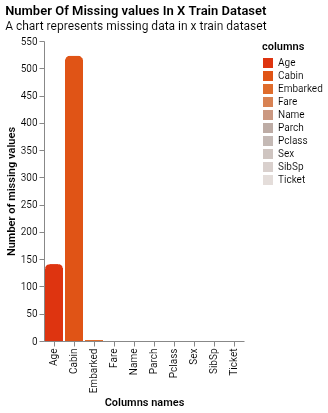

In [130]:
plot_NaN(
    train_x, 
    name='x train dataset', 
    only_nan=False
)

**conclusion:** X train data sample contains missing data of 21.11%(141) of Age column, 78.29%(523) of cabin column and 0.3%(2) of Embarked column are the amount of missing data in the dataset from the data size of 668.

<h5 style="font-weight: bold;">Two) X validation dataset</h5>

In [120]:
check_n_NaN(valid_x)

,columns,total_nan,percent_nan
0,Age,36,16.14%
1,Cabin,164,73.54%


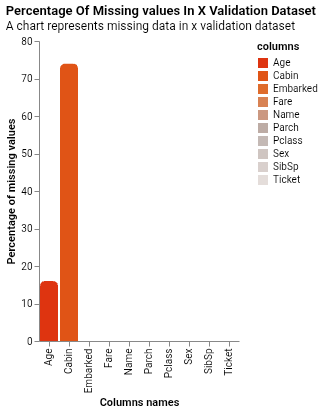

In [131]:
plot_NaN(
    valid_x, 
    name='x validation dataset', 
    only_nan=False,
    use_percent=True
)

**conclusion:** In X validation data sample there are 16.14%(36) of Age column and 73.54%(164) of cabin column are the amount of missing data in the dataset from the data size of 223.

<h4 style="font-weight: bold;">b) Observing missing data in test dataset</h4>

In [132]:
check_n_NaN(test_df)

,columns,total_nan,percent_nan
0,Age,86,20.57%
1,Fare,1,0.24%
2,Cabin,327,78.23%


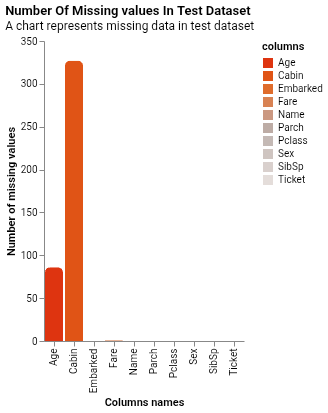

In [134]:
plot_NaN(
    test_df, 
    name='test dataset', 
    only_nan=False,
    use_percent=False
)

**conclusion:** The test data frame contains missing data of 20.57%(86) of Age column, 78.23%(327) of cabin column and 0.24%(1) of Fare column are the amount of missing data in the dataset from the data size of 418.